In [23]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline
import math

In [24]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [25]:
root = '/home/aalejo/proyectos/CSRNet-pytorch/data/ShanghaiTech/'

In [26]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [27]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [28]:
model = CSRNet()

In [29]:
model = model.cuda()

In [30]:
checkpoint = torch.load('0model_best.pth.tar')

In [31]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [33]:
from tqdm import tqdm

mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print (mae/len(img_paths))

0 3507.870361328125
1 15096.512939453125
2 15728.9521484375
3 16749.33837890625
4 23963.603515625
5 26311.560546875
6 27920.4267578125
7 30546.23046875
8 31700.20654296875
9 36373.1640625
10 37742.96875
11 39213.63928222656
12 39655.310150146484
13 42798.73764038086
14 44603.033782958984
15 50397.705657958984
16 53582.99691772461
17 55911.433197021484
18 59714.675384521484
19 66015.04061889648
20 68393.74667358398
21 71053.42001342773
22 72890.76974487305
23 73835.1955871582
24 75117.44192504883
25 77411.9680480957
26 89353.1575012207
27 91704.36282348633
28 94938.9260559082
29 99397.60330200195
30 101110.17520141602
31 102493.33560180664
32 106522.37857055664
33 109318.71206665039
34 111586.82778930664
35 119514.32583618164
36 122768.67422485352
37 128896.85488891602
38 132170.43203735352
39 134344.19668579102
40 137746.57998657227
41 140490.20889282227
42 146921.52041625977
43 148983.03359985352
44 152438.9317932129
45 152538.55111694336
46 154759.14486694336
47 160870.8016052246
48 

In [34]:
mae = 0
mse = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    mse += (output.detach().cpu().sum().numpy()-np.sum(groundtruth))**2
print ('mae=', mae/len(img_paths))
print ('mse=', math.sqrt(mse/len(img_paths)) )

100%|██████████| 182/182 [00:07<00:00, 23.89it/s]

mae= 69.35579293638796
mse= 106.76149097798056


Predicted Count :  23


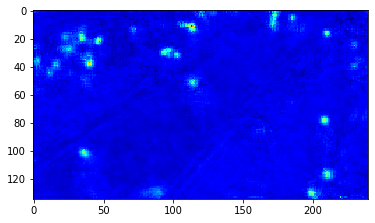

Original Count :  382


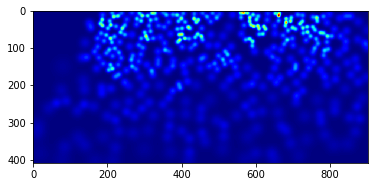

Original Image


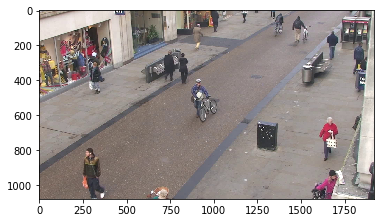

In [16]:
path = 'data/ShanghaiTech/part_A/test_data/images/IMG_100.jpg';
path = 'img/frame0.jpg';

from matplotlib import cm as c
img = transform(Image.open(path).convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))


temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('data/ShanghaiTech/part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(path))
plt.show()